In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def plot_gallery(images):
# Affiche les 12 premières images contenues dans images
# images est de taille Nb image*Ny*Nx plt.figure(figsize=(7.2, 7.2))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) 
  for i in range(12):
    plt.subplot(3, 4, i + 1) 
    plt.imshow(images[i], cmap=plt.cm.gray) 
    plt.xticks(())
    plt.yticks(())
  plt.show()

taille des images 62x47 = 2914
nombre d'images = 1288
nombde de classe 7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


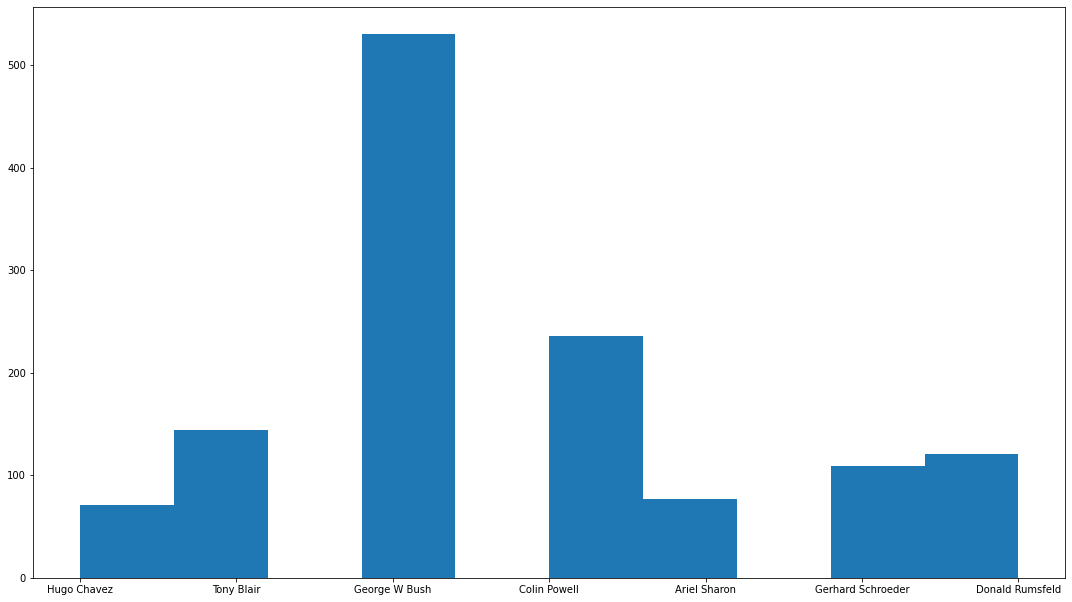

In [ ]:
[X, y, name]=np.load("TP1.npy",allow_pickle=True )
print("taille des images ",np.shape(X[0])[0], "x", np.shape(X[0])[1], " = ", np.size(X[0]), sep='')
print("nombre d'images =", len(X))
print("nombde de classe", len(name))
print(name)
fig = plt.figure(1)
plt.hist([name[i] for i in y ])
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()


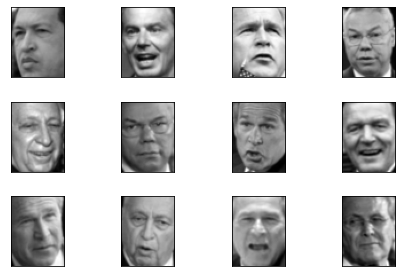

In [ ]:
plot_gallery(X)

In [ ]:
def train_test_split(X):
  X_test = []
  y_test = []
  liste = np.random.choice(range(len(X)),int(len(X)*0.26),replace=False)
  for i in liste:
    X_test.append(X[i])
    y_test.append(y[i])
  X_train = [x for i , x in enumerate(X) if i not in liste ]
  y_train = [y for i , y in enumerate(y) if i not in liste ]

  return X_train, y_train, X_test, y_test 


In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X)


In [ ]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(954, 62, 47)
(954,)
(334, 62, 47)
(334,)


In [ ]:

X_train = np.reshape(X_train, (np.shape(X_train)[0], np.shape(X)[1]*np.shape(X)[2]))

X_test = np.reshape(X_test, (np.shape(X_test)[0], np.shape(X)[1]*np.shape(X)[2]))

In [ ]:
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train) # données moyenné centré 

In [ ]:
neigh = KNeighborsClassifier( n_neighbors=1, metric='euclidean')
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
print(confusion_matrix(y_pred=y_pred, y_true=y_test))
print(confusion_matrix(y_pred=y_pred, y_true=y_test).trace())
print(accuracy_score(y_test, y_pred, normalize=False))

[[ 6  5  2  5  0  1  1]
 [ 2 29  4 11  3  1  9]
 [ 0  2 15 10  1  1  3]
 [ 2 12  8 94  6  2 13]
 [ 0  2  2 10  7  0  6]
 [ 0  3  0  9  2  8  2]
 [ 1  3  1 13  4  0 13]]
172
172


In [ ]:
scores = []
k_liste = list(range(1,100))
for k in k_liste:
  neigh = KNeighborsClassifier( n_neighbors=k,metric='euclidean')
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred, normalize=False))

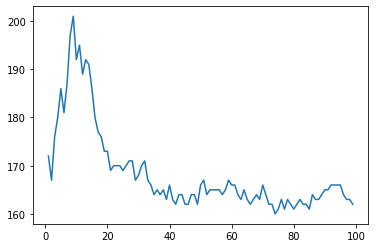

In [ ]:
plt.plot(k_liste,scores)

In [ ]:
scores = []
k_liste = np.arange(1,10) #list(range(1,10))
for k in k_liste:
  neigh = KNeighborsClassifier( n_neighbors=k,metric='manhattan')
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred, normalize=False))

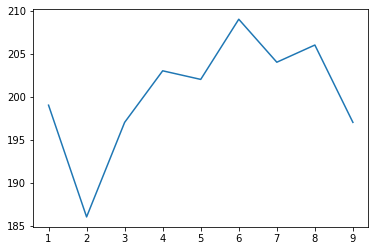

In [ ]:
plt.plot(k_liste,scores)